# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable.\
On cherche ici à déterminer la relation entre la géomètrie d'une digue en béton sur de la roche et sa stabilité.
![Digue.png](./Digue.png)

On négligera ici la pression de l'air, le bilan des forces donne donc:
- Le poids de la digue $m\vec{g}$ 
- La réaction verticale du sol $\vec{R}$ 
- Les forces de pressions de l'eau $\vec{P}$ 
- Les forces de frottements avec le sol $\vec{f}$ 

Si on néglige la pression de l'air alors $P(H)=0$, le principe de Pascal nous donne alors $P_{eau}(x)=\rho_{eau} g(H-x)$.

Le principe fondamental de la dynamique à l'équilibre donne (avec $(Ox)$ l'axe des abscisse sur le schéma et $(Oy)$ celui des ordonnées):\
$$m\vec{g}+\vec{R}+\vec{P}+\vec{f}=\vec{0}$$

$$\Rightarrow -mg\vec{e_y}+R\vec{e_y}-P\vec{e_x}+f\vec{e_x}=\vec{0}$$

Sur $\vec{e_y}$:

$$mg=R$$

Sur $\vec{e_x}$:

$$P=f$$

A l'équilibre le poids et la réaction du support se compensent, les forces de pressions et de frottements aussi.

Pour considérer une digue de forme arbitraire, on modélisera les pentes côté air et côté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (schéma ci-dessous).
![DigueSchema.png](./DigueSchema.png)


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe côté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$ 

$$
f_{eau}(y)= -\frac{x_e}{H}.(y-H)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Kn(f,x):
    """ Renvoie l'intégrale d'une fonction f entre x[0] et x[-1]
        (x doit être un array numpy ou une liste)
        selon la méthode des trapèzes
    """
    n=int(len(x)/5) #le choix du 5 est purement arbitraire
    delta=(x[-1]-x[0])/n
    K=np.zeros(n)
    for i in range(n):
        x_i=x[0]+i*delta
        x_iplus1=x_i+delta
        K[i]=(1/2)*(f(x_i)+f(x_iplus1))*delta
    return K.sum()

In [3]:
#Constantes
H = 10
xa = -5
xe = +5
rho=1000 #Masse volumique de l'eau en kg/m^3
g=9.81
rho_b=3000 #Masse volumique du béton en kg/m^3

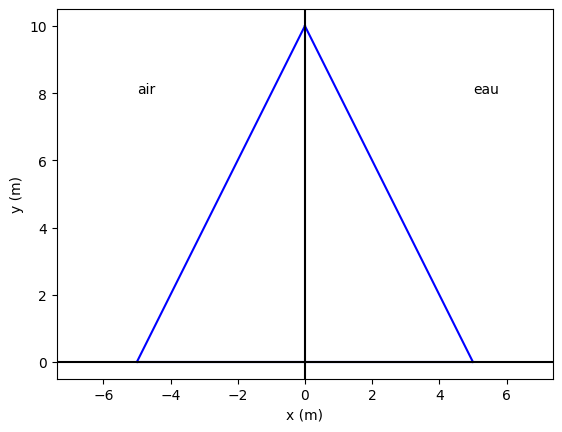

In [4]:
# Ce code permet d'afficher les courbes représentant la digue
# On définit les fonctions côté eau et côté air, ici les courbes concaves

def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return -(y - H) * xe / H


y = np.linspace(0, H, 1000)


plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

On cherche un vecteur directeur aux forces de pressions (qui sont perpendiculaires à la surface).


![DigueAngles.png](./DigueAngles.png)

L'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$

Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

Le volume est donné par:
$$V=\frac{1}{2}(x_e-x_a) \int_0^H  \mathrm{d}y$$ où $l$ est la longueur le long de l'axe perpendiculaire au schéma (longueur unitaire).\
$\rho_{béton}$ est constante,  $x_e-x_a=10\ m$ et $H=10\ m$, on a donc $V=50\ m^3$. 

In [5]:
xa = -5
xe = +5

V=(1/2)*1*(xe-xa)*Kn(lambda y: 1,y) #lambda y: 1 est la fonction constante à 1

print(f"La valeur trouvée du volume est {V} m^3, la différence avec la valeur analytique est de {V-50} m^3.")

La valeur trouvée du volume est 50.0 m^3, la différence avec la valeur analytique est de 0.0 m^3.


$$
\vec{F} = \int_0^H P(y) \frac{\mathrm{d}y}{cos(\theta)} .(sin\theta \ \vec{u_y} - cos\theta \ \vec{u_x}) = \int_0^H P(y) \mathrm{d}y .(tan\theta \ \vec{u_y} - \vec{u_x})
$$
D'où:
$$ \vec{F} = \int_0^H P(y)\ (f'(y) \ \vec{u_y} - \vec{u_x})\ \mathrm{d}y $$

In [6]:
def P(y):
    """ Retourne la pression de l'eau
        en fonction de y (un array numpy)
    """
    return rho*g*(H-y)

f_prime=lambda y: -xe/H #Donne la fonction constante de la dérivée de la fonction côté eau

Pf_prime=lambda y: P(y)*f_prime(y)

Fy=Kn(Pf_prime,y)
Fx=-Kn(P,y)

print(f"Les valeurs des composantes des résultantes des forces de pressions exercées par l'eau sont, selon y, {Fy:.2f} N et, selon x, {Fx:.2f} N.")

Les valeurs des composantes des résultantes des forces de pressions exercées par l'eau sont, selon y, -245250.00 N et, selon x, -490500.00 N.


Pour avoir équilibre statique on doit avoir:
$$\left| \dfrac{T}{N}\right| \le \mu$$
où $T$, $N$ sont respectivement les composantes tangentielles et normales de la force de réaction du sol\
$\mu=0.5$ est le coeffecient de frottements statiques.\
Ici $T$ et $N$ sont de mêmes signes, on peut oublier la valeur absolue.

In [7]:
N=rho_b*V*g-Fy #N=mg-Fy
T=-Fx #T=-Fx

if T/N<=0.5:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.")
else:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.")

Le rapport trouvée est de 0.29, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.


On reprend le calcul avec $x_e=0$ et $x_a=-5$: 

In [8]:
xa=-5
xe=0

V=(1/2)*1*(xe-xa)*Kn(lambda y: 1,y)

Fy=Kn(Pf_prime,y)
Fx=-Kn(P,y)

N=rho_b*V*g-Fy
T=-Fx

if T/N<=0.5:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.")
else:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.")

Le rapport trouvée est de 0.67, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.


On reprend encore une fois le calcul mais avec $x_e=5$ et $x_a=0$:

In [9]:
xa=0
xe=5

V=(1/2)*1*(xe-xa)*Kn(lambda y: 1,y)

Fy=Kn(Pf_prime,y)
Fx=-Kn(P,y)

N=rho_b*V*g-Fy
T=-Fx

if T/N<=0.5:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.")
else:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.")

Le rapport trouvée est de 0.50, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.


Dans ces deux cas on a plus qu'un triangle rectangle pour la digue, cependant dans le deuxième cas\
la bas du triangle rectangle est du côté de l'eau.\
Cela implique que les forces de pressions selon $\vec{e_y}$ ne sont pas nulles et donc pas entièrement selon $\vec{u_x}$, ce qui permet d'alléger la\
quantité de force que la réaction tangentielle du sol doit compenser.

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

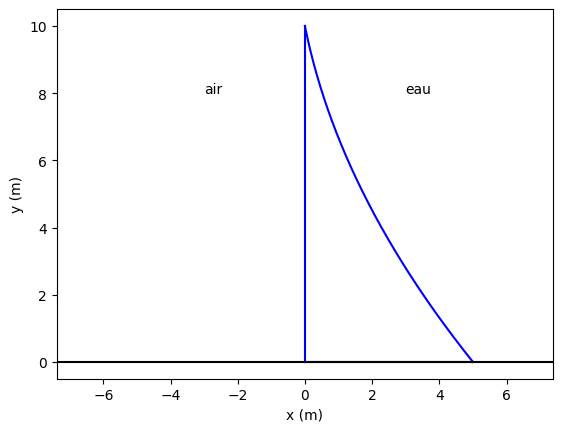

In [10]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

On calcule ici le volume de la digue.\
On intègre selon $(Oy)$ et $(Oz)$:
$$V=\iint f_{eau}(y)\  \mathrm{d}y \ \mathrm{d}z$$
$$V=L \int_0^H a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e \  \mathrm{d}y$$
D'où:
$$V=LH(\frac{a}{3} - \frac{a+x_e}{2} + x_e)$$

On re-calcule le rapport $\frac{T}{N}$ avec $a=3$, $x_a=0$ et $x_e=5$:

In [11]:
V=H*(a/3 - (a+xe)/2 + xe)

def f_prime(y):
    return (2*a*y)/H**2 - (a+xe)/H

Fy=Kn(Pf_prime,y)
Fx=-Kn(P,y)

N=rho_b*V*g-Fy
T=-Fx

if T/N<=0.5:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.")
else:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.")

Le rapport trouvée est de 0.56, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.


On fait la même chose avec $x_e=6$:

In [12]:
xe=6
V=H*(a/3 - (a+xe)/2 + xe)

def f_prime(y):
    return (2*a*y)/H**2 - (a+xe)/H

Fy=Kn(Pf_prime,y)
Fx=-Kn(P,y)

N=rho_b*V*g-Fy
T=-Fx
if T/N<=0.5:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.")
else:
    print(f"Le rapport trouvée est de {T/N:.2f}, le coefficient de frottements statique roche-béton est de 0.5. La digue n'est pas en équilibre translationnel.")

Le rapport trouvée est de 0.45, le coefficient de frottements statique roche-béton est de 0.5. La digue est bien en équilibre translationnel.


On va maintenant calculer ce rapport pour un certain nombre de valeurs de $x_e \in [5,6]$\
afin de déterminer la valeur minimale du volume pour que la digue soit en équilibre translationnel.\
\
En effet plus $x_e$ est grand plus la courbe est applatie, ainsi plus $x_e$ est grand plus la composante selon $(Oy)$ des forces de pressions est grande.\
De cette manière la réaction normale du sol compense une plus grande partie des forces de pression, or la limite de cette composante de la réaction du sol est plus importante que celle tangentielle, avoir une digue plus applatie permet donc une plus grande résistance.\
Un plus grand $x_e$ correspond aussi à un plus grand volume pour un même $H$, un plus grand volume permet donc une plus grande résistance aux forces de pressions et une plus grande masse.\
Cela correspond donc à un plus grand $N$ et donc un plus petit rapport $\left |\frac{T}{N}\right |$.

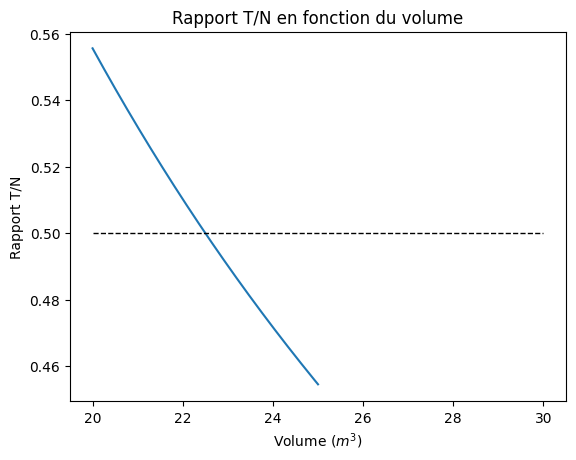

In [13]:
xe=np.linspace(5,6,1000)
T_N=[]
V=[]
for x in xe:
    v=H*(a/3 - (a+x)/2 + x)
    V.append(v)

    def f_prime(y):
        return (2*a*y)/H**2 - (a+x)/H

    Fy=Kn(Pf_prime,y)
    Fx=-Kn(P,y)

    N=rho_b*v*g-Fy
    T=-Fx
    T_N.append(T/N)


plt.plot(V,T_N)
plt.plot(np.linspace(20,30,1000),np.linspace(0.5,0.5,1000), "--k", linewidth=1) #ligne à 0.5
plt.xlabel("Volume ($m^3$)")
plt.ylabel("Rapport T/N")
plt.title("Rapport T/N en fonction du volume")
plt.show()

In [14]:
#On cherche la limite de V à partir de laquelle T/N <= 0.5
Diff=(abs(np.array(T_N)-0.5)) #Différence (en valeur absolue) entre 
Index=np.where(Diff==Diff.min())[0][0]

print(f"La valeur minimale de V pour laquelle le rapport T/N passe en dessous de 0.5 est de {V[Index]:.2f} m^3.")

La valeur minimale de V pour laquelle le rapport T/N passe en dessous de 0.5 est de 22.50 m^3.


## __Conclusion__

En conclusion un volume plus important permet un meilleur équilibre.\
On trouve comme valeur minimale pour le volume de $V=22.5\ m^3$ pour l'équilibre translationnelle d'un digue en béton sur de la roche d'une hauteur $H=10\ m$.